In [2]:
import re
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy.interpolate import LinearNDInterpolator
import pywt
from astropy.io import fits
from astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord


In [ ]:
def zpx_correct(fits_hdul):
    
    wat_combined = []

    for extension in fits_hdul:
        wat_keywords = extension.header
        print(wat_keywords)

    return

hdul_raw = fits.open('fits\k4n_170113_084822_ori.fits.fz')
hdul_dqm = fits.open('fits\k4n_170113_085437_ood_KXs_v1.fits.fz')
hdul_skysub = fits.open('fits\k4n_170113_085437_oki_KXs_v1.fits.fz')
hdul_instcal = fits.open('fits\k4n_170113_085437_ooi_KXs_v1.fits.fz')

print(hdul_skysub[0].header['SSUBINFO'])

hdr = hdul_instcal[0].header

fits.conf.strip_header_whitespace = True
#w = wcs.WCS(hdul_instcal[0].header)

NameError: name 'fits' is not defined

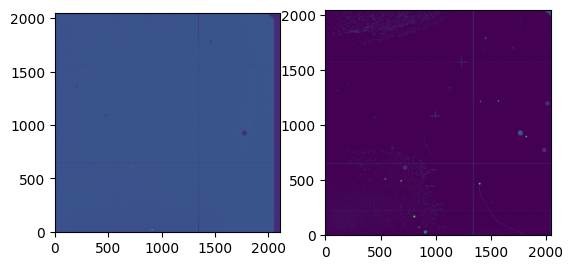

In [3]:
fits_image_raw = hdul_raw[1].data

plt.figure()
plt.subplot(1,2,1)
plt.imshow(fits_image_raw)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)

fits_image_dqm = hdul_dqm[1].data

plt.imshow(fits_image_dqm)
plt.gca().invert_yaxis()

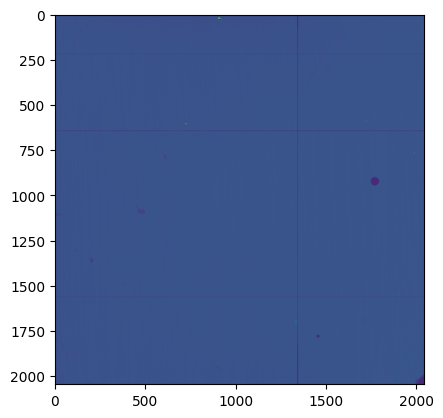

In [4]:
plt.figure()

row_range = range(1,np.size(fits_image_dqm,axis=0)+1)
col_range = range(1,np.size(fits_image_dqm,axis=1)+1)

img_slice = np.ix_(row_range,
                   col_range)

fits_raw_active = fits_image_raw[img_slice]

plt.imshow(fits_raw_active)        


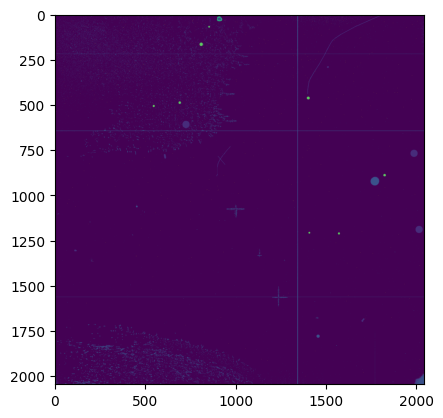

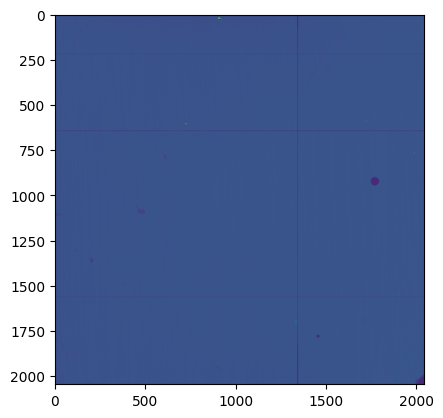

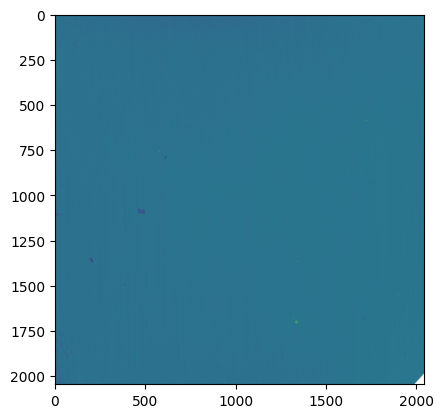

In [5]:
#fits_raw_active2 = fits_raw_active[600:700,1300:1400]
#fits_image_dqm2 = fits_image_dqm[600:700,1300:1400]

plt.figure()
plt.imshow(fits_image_dqm)

X, Y = np.meshgrid(range(0,np.size(fits_raw_active,1)),range(0,np.size(fits_raw_active,0)))

dq0_mask = fits_image_dqm != 0 # invalid elements

x_valid = X[~dq0_mask]
y_valid = Y[~dq0_mask]

valid_elements = fits_raw_active[~dq0_mask]

interp = LinearNDInterpolator(list(zip(x_valid, y_valid)), valid_elements)

plt.figure()
plt.imshow(fits_raw_active)

healed_raw = interp(X,Y)
plt.figure()
plt.imshow(healed_raw)

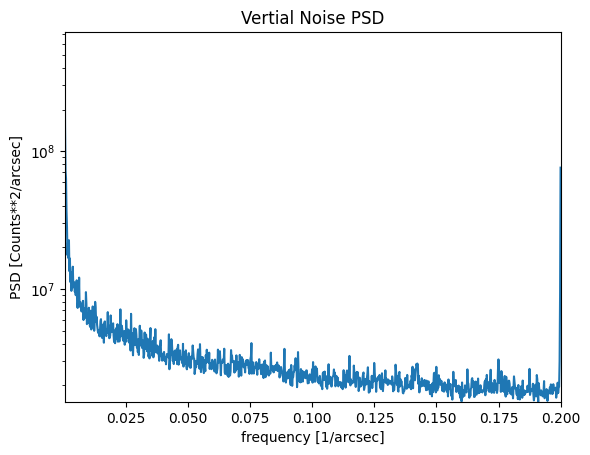

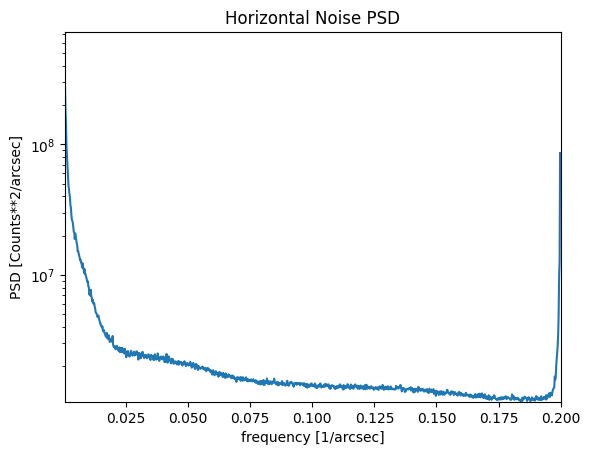

In [6]:
plt.figure()
mean_healed = np.nanmean(healed_raw,axis=None)
nan_inds = np.where(np.isnan(healed_raw))
healed_raw[nan_inds] = mean_healed

f_vert, Pxx_den_vert = signal.periodogram(healed_raw, 0.40,axis=1)
plt.semilogy(f_vert, np.mean(Pxx_den_vert, axis=0))
plt.xlim([f_vert[1],np.max(f_vert)])
plt.ylim([np.min(np.mean(Pxx_den_vert, axis=0)[1:-1]),np.max(np.mean(Pxx_den_vert, axis=0)[1:-1])])
plt.xlabel('frequency [1/arcsec]')
plt.ylabel('PSD [Counts**2/arcsec]')
plt.title('Vertial Noise PSD')
plt.show()

plt.figure()
f_horz, Pxx_den_horz = signal.periodogram(healed_raw, 0.40,axis=0)
plt.semilogy(f_horz, np.mean(Pxx_den_horz, axis=1))
plt.xlim([f_horz[1],np.max(f_horz)])
plt.ylim([np.min(np.mean(Pxx_den_horz, axis=1)[1:-1]),np.max(np.mean(Pxx_den_horz, axis=1)[1:-1])])
plt.xlabel('frequency [1/arcsec]')
plt.ylabel('PSD [Counts**2/arcsec]')
plt.title('Horizontal Noise PSD')
plt.show()

<BarContainer object of 100 artists>

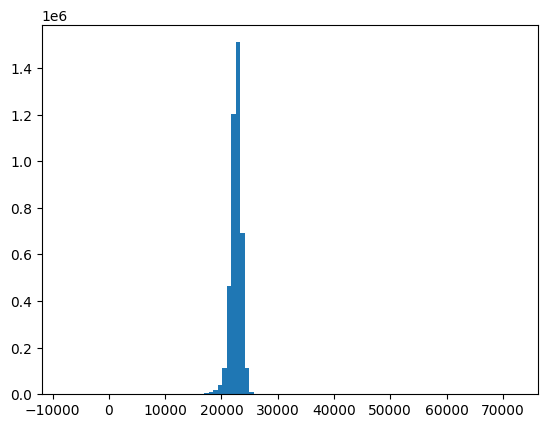

In [7]:
plt.figure()
hist_vals,hist_bins = np.histogram(healed_raw.ravel(),bins=100)
plt.bar(hist_bins[:-1],hist_vals, width=np.diff(hist_bins), align='center')